<a href="https://colab.research.google.com/github/indahpurwatiiii/SQL-Code/blob/main/Animal_Trade_CITES_Wildlife_Trade_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The CITES trade database
The CITES trade database, managed by UNEP-WCMC on behalf of the CITES Secretariat, is a unique resource and currently holds 7 million records of trade in wildlife and 50,000 scientific names of taxa listed by CITES. Currently, more than 500,000 records of trade in CITES-listed species of wildlife are reported annually.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')


# Input Data

In [ ]:
df = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/trade_data 2017-2021.csv')
df.head()

<ipython-input-52-65b300354563>:1: DtypeWarning:

Columns (4,17,19) have mixed types. Specify dtype option on import or set low_memory=False.



,Id,Year,Appendix,Taxon,Class,Order,Family,Genus,Term,Quantity,Unit,Importer,Exporter,Origin,Purpose,Source,Reporter.type,Import.permit.RandomID,Export.permit.RandomID,Origin.permit.RandomID
0,4854786147,2019,II,Abronia deppii,Reptilia,Sauria,Anguidae,Abronia,live,20.0,Number of specimens,KR,MX,NaN,T,C,I,NaN,8482af1212,NaN
1,4242990847,2019,II,Abronia taeniata,Reptilia,Sauria,Anguidae,Abronia,live,6.0,Number of specimens,KR,CZ,GB,T,F,I,NaN,5a67a4d258,NaN
2,9884808547,2020,II,Acampe ochracea,NaN,Orchidales,Orchidaceae,Acampe,live,10.0,Number of specimens,US,TH,NaN,T,A,E,NaN,57736d6680,NaN
3,2661723747,2020,II,Acampe ochracea,NaN,Orchidales,Orchidaceae,Acampe,live,5.0,Number of specimens,US,TH,NaN,T,A,E,NaN,d5a7c04d7a,NaN
4,4279308447,2020,II,Acampe praemorsa,NaN,Orchidales,Orchidaceae,Acampe,live,5.0,Number of specimens,DE,TH,NaN,T,A,E,NaN,e6128a3056,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      500000 non-null  int64  
 1   Year                    500000 non-null  int64  
 2   Appendix                500000 non-null  object 
 3   Taxon                   500000 non-null  object 
 4   Class                   338758 non-null  object 
 5   Order                   499993 non-null  object 
 6   Family                  497541 non-null  object 
 7   Genus                   492476 non-null  object 
 8   Term                    500000 non-null  object 
 9   Quantity                500000 non-null  float64
 10  Unit                    417287 non-null  object 
 11  Importer                499971 non-null  object 
 12  Exporter                499877 non-null  object 
 13  Origin                  238581 non-null  object 
 14  Purpose             

In [ ]:
df.describe()

,Id,Year,Quantity
count,5.000000e+05,500000.000000,5.000000e+05
mean,5.502986e+09,2019.501794,3.708209e+03
std,2.594894e+09,0.514367,1.135610e+06
min,1.000002e+09,2017.000000,4.800000e-05
25%,3.257081e+09,2019.000000,1.000000e+00
50%,5.507834e+09,2020.000000,5.000000e+00
75%,7.746045e+09,2020.000000,2.400000e+01
max,9.999987e+09,2022.000000,7.200000e+08


In [55]:
unique_categories = df['Importer'].unique()
print(unique_categories)

['KR' 'US' 'DE' 'KE' 'JP' 'HK' 'NZ' 'AE' 'CN' 'ZA' 'XX' 'IL' 'MY' 'CH'
 'GG' 'NL' 'SG' 'GB' 'PL' 'RU' 'CA' 'TW' 'BR' 'UA' 'NO' 'ES' 'BH' 'DK'
 'IQ' 'TR' 'PT' 'FR' 'IT' 'PE' 'PK' 'AR' 'KW' 'IR' 'CZ' 'LK' 'CL' 'AU'
 'JO' 'QA' 'KH' 'SA' 'KG' 'SK' 'CR' 'ID' 'ZM' 'ZW' 'IN' 'ET' 'TH' 'HU'
 'AW' 'KY' 'VN' 'EE' 'PA' 'BE' 'LV' 'LU' 'GT' 'VA' 'KV' 'GE' 'MD' 'CO'
 'BA' 'MO' 'FI' 'AT' 'CY' 'LT' 'IE' 'MX' 'PH' 'AZ' 'GR' 'LB' 'UY' 'KZ'
 'BG' 'RO' 'SI' 'OM' 'EG' 'NP' 'BD' 'RS' 'UZ' 'AL' 'JE' 'IS' 'TD' 'RE'
 'BY' 'GH' 'DO' 'TT' 'JM' 'TZ' 'VE' 'CI' 'AF' 'MV' 'MG' 'SE' 'IM' 'AD'
 'MM' 'BS' 'SM' 'AO' 'NG' 'UG' 'MU' 'VI' 'LA' 'MC' 'MA' 'SC' 'SD' 'BB'
 'MK' 'CD' 'CU' 'EC' 'GP' 'SX' 'CG' 'MT' 'GI' 'PR' 'GU' 'TM' 'TN' 'BO'
 'DZ' 'HR' 'AG' 'AM' 'GQ' 'VG' 'LY' 'KN' 'ME' 'LC' 'TC' 'BM' 'PY' 'MN'
 'BL' 'YE' 'SV' 'TJ' 'BN' 'BZ' 'FJ' 'CS' 'MF' 'LR' 'HN' 'TF' 'NC' 'GD'
 'DM' 'HT' nan 'MZ' 'BF' 'XV' 'ML' 'BQ' 'SN' 'SR' 'BJ' 'MQ' 'BT' 'PG' 'CW'
 'GY' 'MR' 'SY' 'BW' 'VU' 'KP' 'TG' 'GL' 'PW' 'GA' 'SL' 'GM' 'MW' 'SZ'
 '

In [56]:
unique_categories = df['Exporter'].unique()
print(unique_categories)

['MX' 'CZ' 'TH' 'TO' 'AU' 'US' 'CR' 'VN' 'KR' 'TW' 'HK' 'NL' 'ID' 'CN'
 'ZA' 'IT' 'GB' 'DE' 'ES' 'PL' 'CH' 'SI' 'KG' 'SA' 'JE' 'CA' 'CO' 'EC' nan
 'ZW' 'XX' 'HU' 'FR' 'DK' 'MG' 'NZ' 'BY' 'AE' 'IR' 'SG' 'JP' 'RU' 'SE'
 'BE' 'AT' 'FI' 'MY' 'MO' 'UY' 'UA' 'BG' 'GR' 'LV' 'IS' 'IL' 'GE' 'RO'
 'PG' 'BQ' 'MA' 'BH' 'IN' 'NI' 'UZ' 'PH' 'KW' 'JO' 'RS' 'CU' 'VE' 'LB'
 'OM' 'CW' 'MU' 'UG' 'SC' 'PT' 'QA' 'IE' 'SL' 'SZ' 'TR' 'CL' 'MR' 'BR'
 'CY' 'PY' 'MC' 'AR' 'SK' 'AW' 'DO' 'KE' 'GT' 'PE' 'SV' 'SN' 'SR' 'GY'
 'MK' 'BM' 'EG' 'TN' 'LA' 'BD' 'NG' 'SY' 'PA' 'IM' 'GL' 'FK' 'SD' 'HR'
 'BT' 'BO' 'SB' 'GG' 'LT' 'KH' 'GH' 'TG' 'ET' 'PK' 'TJ' 'LK' 'CV' 'CI'
 'ML' 'BW' 'CD' 'BJ' 'AI' 'ZM' 'KN' 'MW' 'MZ' 'TZ' 'MM' 'VU' 'CK' 'LU'
 'BZ' 'KZ' 'MN' 'CM' 'CF' 'CG' 'GA' 'GQ' 'AZ' 'SX' 'DM' 'SM' 'FJ' 'AO'
 'GM' 'VC' 'HN' 'TC' 'BS' 'JM' 'SH' 'KI' 'NE']


# Clean Data
Untuk membuat data dalam kolom negara menjadi nama negara tanpa singkatan serta kolom tujuan

In [57]:
# Membuat fungsi untuk mengubah nilai Purpose
def recode_purpose(value):
    if value == "B":
        return "Breeding"
    elif value == "E":
        return "Educational"
    elif value == "G":
        return "Garden"
    elif value == "H":
        return "Hunting"
    elif value == "L":
        return "Law"
    elif value == "M":
        return "Medical"
    elif value == "R":
        return "reintroduction to wild"
    elif value == "P":
        return "Personal"
    elif value == "Q":
        return "Circus"
    elif value == "S":
        return "Scientific"
    elif value == "T":
        return "Commercial"
    elif value == "Z":
        return "Zoo"
    else:
        return "Unknown"

# Membuat fungsi untuk mengubah nilai Excountry dan Imcountry
def recode_country(value):
    country_codes = {
        'KR': 'South Korea',
        'US': 'United States',
        'DE': 'Germany',
        'KE': 'Kenya',
        'JP': 'Japan',
        'HK': 'Hong Kong',
        'NZ': 'New Zealand',
        'AE': 'United Arab Emirates',
        'CN': 'China',
        'ZA': 'South Africa',
        'XX': 'Unknown',
        'IL': 'Israel',
        'MY': 'Malaysia',
        'CH': 'Switzerland',
        'GG': 'Guernsey',
        'NL': 'Netherlands',
        'SG': 'Singapore',
        'GB': 'United Kingdom',
        'PL': 'Poland',
        'RU': 'Russia',
        'CA': 'Canada',
        'TW': 'Taiwan',
        'BR': 'Brazil',
        'UA': 'Ukraine',
        'NO': 'Norway',
        'ES': 'Spain',
        'BH': 'Bahrain',
        'DK': 'Denmark',
        'IQ': 'Iraq',
        'TR': 'Turkey',
        'PT': 'Portugal',
        'FR': 'France',
        'IT': 'Italy',
        'PE': 'Peru',
        'PK': 'Pakistan',
        'AR': 'Argentina',
        'KW': 'Kuwait',
        'IR': 'Iran',
        'CZ': 'Czech Republic',
        'LK': 'Sri Lanka',
        'CL': 'Chile',
        'AU': 'Australia',
        'JO': 'Jordan',
        'QA': 'Qatar',
        'KH': 'Cambodia',
        'SA': 'Saudi Arabia',
        'KG': 'Kyrgyzstan',
        'SK': 'Slovakia',
        'CR': 'Costa Rica',
        'ID': 'Indonesia',
        'ZM': 'Zambia',
        'ZW': 'Zimbabwe',
        'IN': 'India',
        'ET': 'Ethiopia',
        'TH': 'Thailand',
        'HU': 'Hungary',
        'AW': 'Aruba',
        'KY': 'Cayman Islands',
        'VN': 'Vietnam',
        'EE': 'Estonia',
        'PA': 'Panama',
        'BE': 'Belgium',
        'LV': 'Latvia',
        'LU': 'Luxembourg',
        'GT': 'Guatemala',
        'VA': 'Vatican City',
        'KV': 'Kosovo',
        'GE': 'Georgia',
        'MD': 'Moldova',
        'CO': 'Colombia',
        'BA': 'Bosnia and Herzegovina',
        'MO': 'Macau',
        'FI': 'Finland',
        'AT': 'Austria',
        'CY': 'Cyprus',
        'LT': 'Lithuania',
        'IE': 'Ireland',
        'MX': 'Mexico',
        'PH': 'Philippines',
        'AZ': 'Azerbaijan',
        'GR': 'Greece',
        'LB': 'Lebanon',
        'UY': 'Uruguay',
        'KZ': 'Kazakhstan',
        'BG': 'Bulgaria',
        'RO': 'Romania',
        'SI': 'Slovenia',
        'OM': 'Oman',
        'EG': 'Egypt',
        'NP': 'Nepal',
        'BD': 'Bangladesh',
        'RS': 'Serbia',
        'UZ': 'Uzbekistan',
        'AL': 'Albania',
        'JE': 'Jersey',
        'IS': 'Iceland',
        'TD': 'Chad',
        'RE': 'Réunion',
        'BY': 'Belarus',
        'GH': 'Ghana',
        'DO': 'Dominican Republic',
        'TT': 'Trinidad and Tobago',
        'JM': 'Jamaica',
        'TZ': 'Tanzania',
        'VE': 'Venezuela',
        'CI': 'Côte d\'Ivoire',
        'AF': 'Afghanistan',
        'MV': 'Maldives',
        'MG': 'Madagascar',
        'SE': 'Sweden',
        'IM': 'Isle of Man',
        'AD': 'Andorra',
        'MM': 'Myanmar',
        'BS': 'Bahamas',
        'SM': 'San Marino',
        'AO': 'Angola',
        'NG': 'Nigeria',
        'UG': 'Uganda',
        'MU': 'Mauritius',
        'VI': 'Virgin Islands (US)',
        'LA': 'Laos',
        'MC': 'Monaco',
        'MA': 'Morocco',
        'SC': 'Seychelles',
        'SD': 'Sudan',
        'BB': 'Barbados',
        'MK': 'North Macedonia',
        'CD': 'Democratic Republic of the Congo',
        'CU': 'Cuba',
        'EC': 'Ecuador',
        'GP': 'Guadeloupe',
        'SX': 'Sint Maarten',
        'CG': 'Republic of the Congo',
        'MT': 'Malta',
        'GI': 'Gibraltar',
        'PR': 'Puerto Rico',
        'GU': 'Guam',
        'TM': 'Turkmenistan',
        'TN': 'Tunisia',
        'BO': 'Bolivia',
        'DZ': 'Algeria',
        'HR': 'Croatia',
        'AG': 'Antigua and Barbuda',
        'AM': 'Armenia',
        'GQ': 'Equatorial Guinea',
        'VG': 'British Virgin Islands',
        'LY': 'Libya',
        'KN': 'Saint Kitts and Nevis',
        'ME': 'Montenegro',
        'LC': 'Saint Lucia',
        'TC': 'Turks and Caicos Islands',
        'BM': 'Bermuda',
        'PY': 'Paraguay',
        'MN': 'Mongolia',
        'BL': 'Saint Barthélemy',
        'YE': 'Yemen',
        'SV': 'El Salvador',
        'TJ': 'Tajikistan',
        'BN': 'Brunei Darussalam',
        'BZ': 'Belize',
        'FJ': 'Fiji',
        'CS': 'No abbreviation found',
        'MF': 'Saint Martin',
        'LR': 'Liberia',
        'HN': 'Honduras',
        'TF': 'French Southern and Antarctic Lands',
        'NC': 'New Caledonia',
        'GD': 'Grenada',
        'DM': 'Dominica',
        'HT': 'Haiti',
        'MZ': 'Mozambique',
        'BF': 'Burkina Faso',
        'XV': 'No abbreviation found',
        'ML': 'Mali',
        'BQ': 'Bonaire, Sint Eustatius and Saba',
        'SN': 'Senegal',
        'SR': 'Suriname',
        'BJ': 'Benin',
        'MQ': 'Martinique',
        'BT': 'Bhutan',
        'PG': 'Papua New Guinea',
        'CW': 'Curaçao',
        'GY': 'Guyana',
        'MR': 'Mauritania',
        'SY': 'Syria',
        'BW': 'Botswana',
        'VU': 'Vanuatu',
        'KP': 'North Korea',
        'TG': 'Togo',
        'GL': 'Greenland',
        'PW': 'Palau',
        'GA': 'Gabon',
        'SL': 'Sierra Leone',
        'GM': 'Gambia',
        'MW': 'Malawi',
        'SZ': 'Eswatini',
        'FO': 'Faroe Islands',
        'CF': 'Central African Republic',
        'PF': 'French Polynesia',
        'NE': 'Niger',
        'NI': 'Nicaragua',
        'CV': 'Cabo Verde',
        'GF': 'French Guiana',
        'AI': 'Anguilla'
    }

    return country_codes.get(value, 'Unknown')

# Membaca data dari file CSV
wild = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trade_data 2017-2021.csv")

# Mengubah kolom Purpose
wild["Purpose"] = wild["Purpose"].apply(recode_purpose)

# Mengubah kolom Excountry dan Imcountry
wild["Excountry"] = wild["Exporter"].apply(recode_country)
wild["Imcountry"] = wild["Importer"].apply(recode_country)

# Menyimpan hasil perubahan ke file CSV
wild.to_csv("/content/drive/MyDrive/Colab Notebooks/clean_trade_data 2017-2021.csv", index=False)


<ipython-input-57-3e0d612d7359>:242: DtypeWarning:

Columns (4,17,19) have mixed types. Specify dtype option on import or set low_memory=False.



# Input Data Clean

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_trade_data 2017-2021.csv')
df2.head()

<ipython-input-3-bb0976f56668>:1: DtypeWarning: Columns (4,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_trade_data 2017-2021.csv')


,Id,Year,Appendix,Taxon,Class,Order,Family,Genus,Term,Quantity,...,Exporter,Origin,Purpose,Source,Reporter.type,Import.permit.RandomID,Export.permit.RandomID,Origin.permit.RandomID,Excountry,Imcountry
0,4854786147,2019,II,Abronia deppii,Reptilia,Sauria,Anguidae,Abronia,live,20.0,...,MX,NaN,Commercial,C,I,NaN,8482af1212,NaN,Mexico,South Korea
1,4242990847,2019,II,Abronia taeniata,Reptilia,Sauria,Anguidae,Abronia,live,6.0,...,CZ,GB,Commercial,F,I,NaN,5a67a4d258,NaN,Czech Republic,South Korea
2,9884808547,2020,II,Acampe ochracea,NaN,Orchidales,Orchidaceae,Acampe,live,10.0,...,TH,NaN,Commercial,A,E,NaN,57736d6680,NaN,Thailand,United States
3,2661723747,2020,II,Acampe ochracea,NaN,Orchidales,Orchidaceae,Acampe,live,5.0,...,TH,NaN,Commercial,A,E,NaN,d5a7c04d7a,NaN,Thailand,United States
4,4279308447,2020,II,Acampe praemorsa,NaN,Orchidales,Orchidaceae,Acampe,live,5.0,...,TH,NaN,Commercial,A,E,NaN,e6128a3056,NaN,Thailand,Germany


In [60]:
unique_categories = df2['Excountry'].unique()
print(unique_categories)

['Mexico' 'Czech Republic' 'Thailand' 'Unknown' 'Australia'
 'United States' 'Costa Rica' 'Vietnam' 'South Korea' 'Taiwan' 'Hong Kong'
 'Netherlands' 'Indonesia' 'China' 'South Africa' 'Italy' 'United Kingdom'
 'Germany' 'Spain' 'Poland' 'Switzerland' 'Slovenia' 'Kyrgyzstan'
 'Saudi Arabia' 'Jersey' 'Canada' 'Colombia' 'Ecuador' 'Zimbabwe'
 'Hungary' 'France' 'Denmark' 'Madagascar' 'New Zealand' 'Belarus'
 'United Arab Emirates' 'Iran' 'Singapore' 'Japan' 'Russia' 'Sweden'
 'Belgium' 'Austria' 'Finland' 'Malaysia' 'Macau' 'Uruguay' 'Ukraine'
 'Bulgaria' 'Greece' 'Latvia' 'Iceland' 'Israel' 'Georgia' 'Romania'
 'Papua New Guinea' 'Bonaire, Sint Eustatius and Saba' 'Morocco' 'Bahrain'
 'India' 'Nicaragua' 'Uzbekistan' 'Philippines' 'Kuwait' 'Jordan' 'Serbia'
 'Cuba' 'Venezuela' 'Lebanon' 'Oman' 'Curaçao' 'Mauritius' 'Uganda'
 'Seychelles' 'Portugal' 'Qatar' 'Ireland' 'Sierra Leone' 'Eswatini'
 'Turkey' 'Chile' 'Mauritania' 'Brazil' 'Cyprus' 'Paraguay' 'Monaco'
 'Argentina' 'Slovakia' 'Ar

#Spesies yang paling banyak diperdagangkan berdasarkan Kelas

<Figure size 1000x500 with 0 Axes>

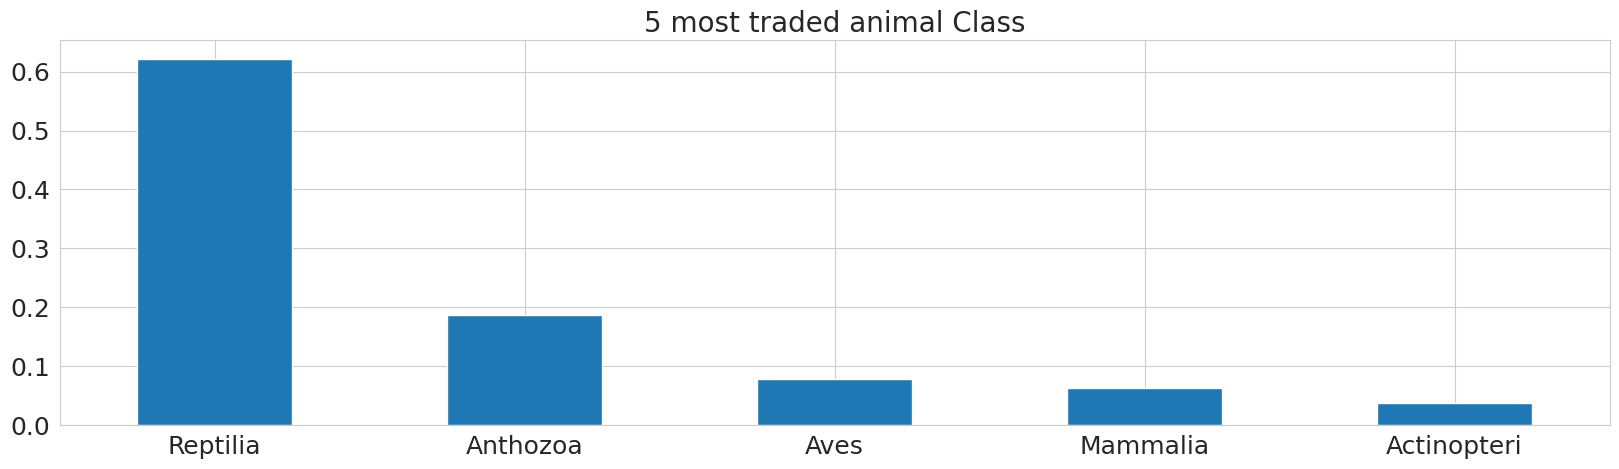

<Figure size 1000x500 with 0 Axes>

In [119]:
class_distribution = df2['Class'].value_counts(normalize=True)
plt.figure(figsize=(20,5))
class_distribution.head(5).plot(kind='bar', fontsize=18)
plt.title('5 most traded animal Class', fontsize=20)
plt.xticks(rotation=0)
plt.figure(figsize=(10,5))

Dari tabel dapat dilihat bahwa spesies dengan kelas Reptilia merupakan spesies yang paling banyak diperdagangkan. Apa saja spesies reptil tersebut lebih detail berdasarkan Taxon?

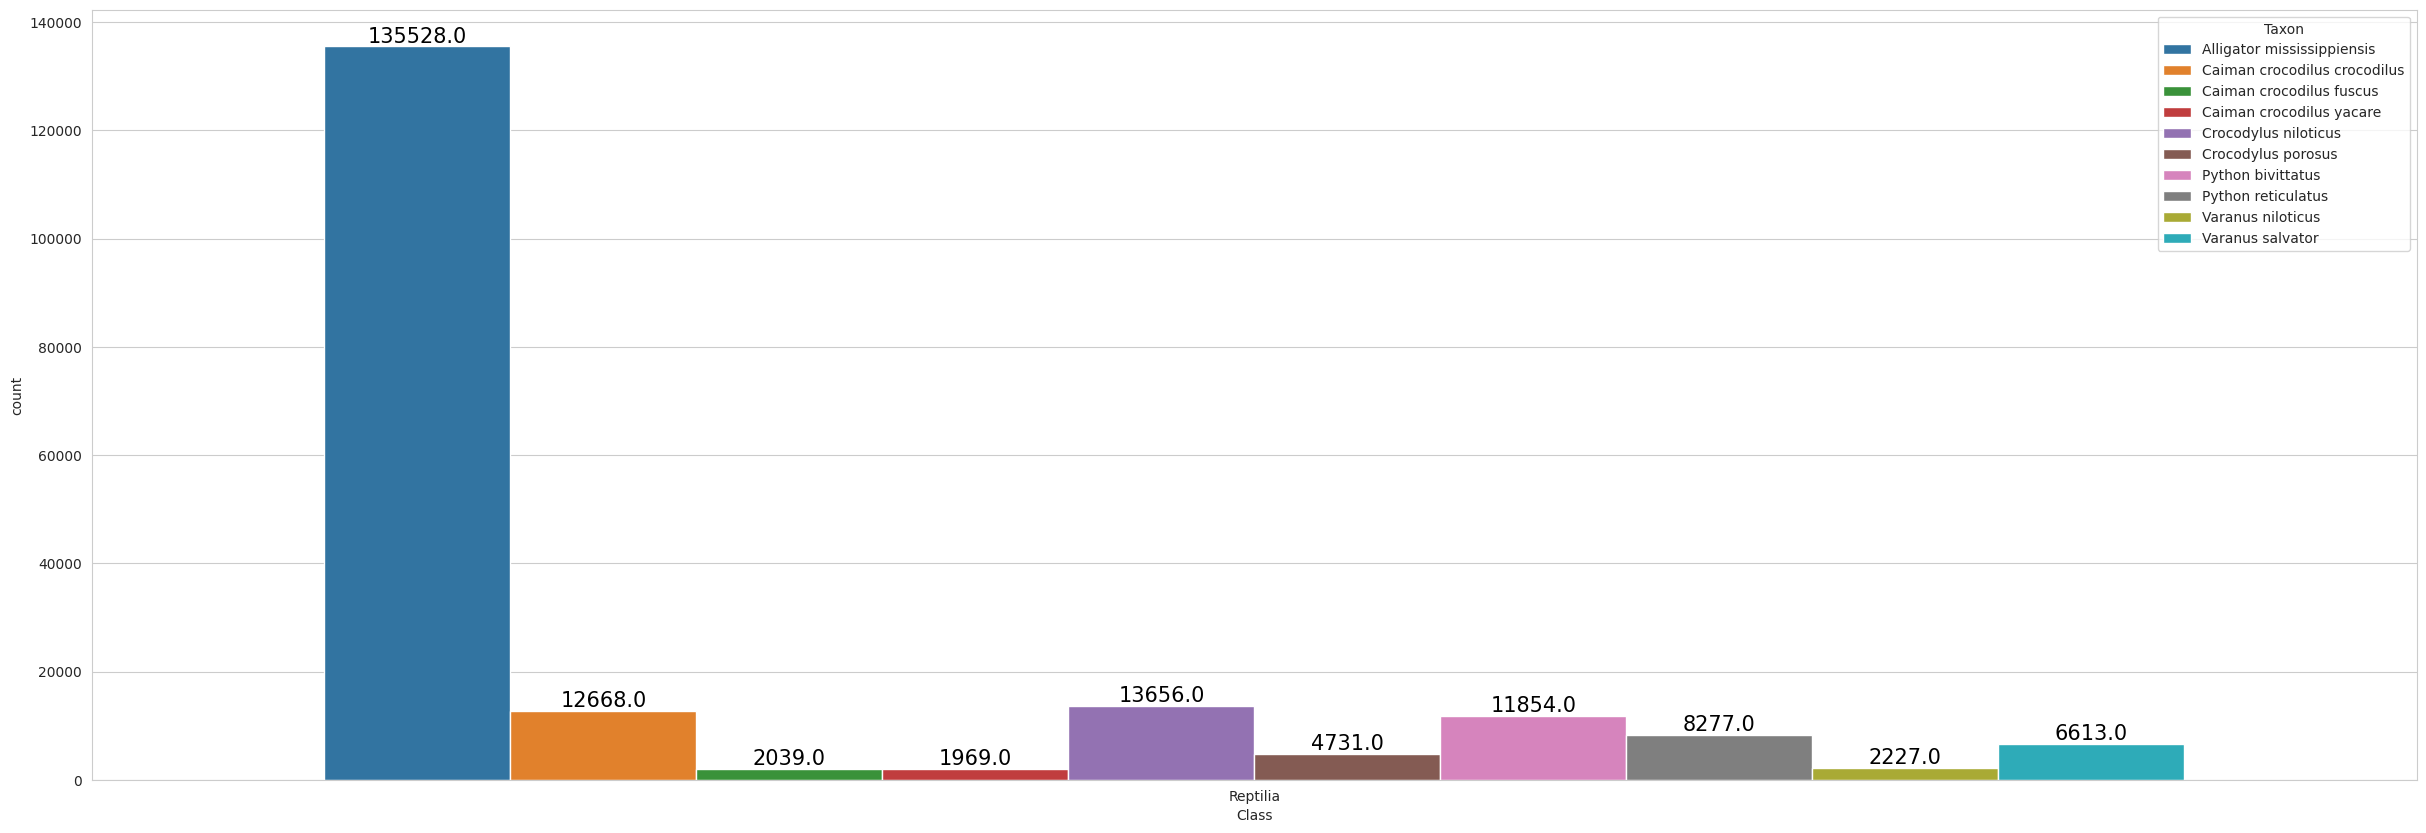

In [99]:
df_commercial = df[df['Class'] == 'Reptilia']
commercial_values = df_commercial['Taxon'].value_counts().nlargest(10).index


selected_data = df[df['Class'].isin(['Reptilia']) & df['Taxon'].isin(commercial_values)]

# Membuat visualisasi bar chart
plt.figure(figsize=(30, 10))
ax = sns.countplot(x='Class', hue='Taxon', data=selected_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')
plt.show()


Berdasarkan taxonnya, Aligator merupakan spesies yang paling banyak menjadi korban perdagangan hewan.

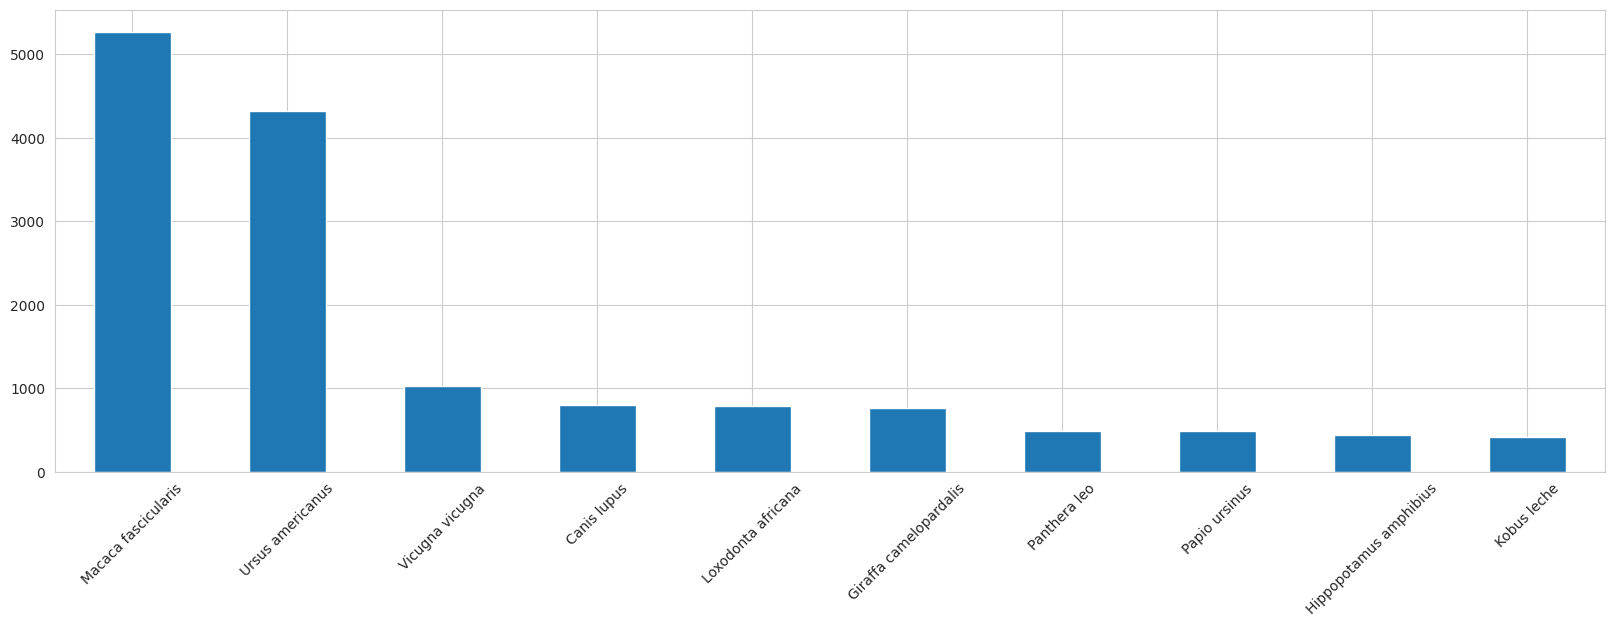

In [182]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Class'] == 'Mammalia']
spesies_counts = df_spesies['Taxon'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

Untuk kelas spesies Mamalia, **Macaca fascicularis dan Ursus americanus** menjadi spesies yang paling banyak di perdagangkan.

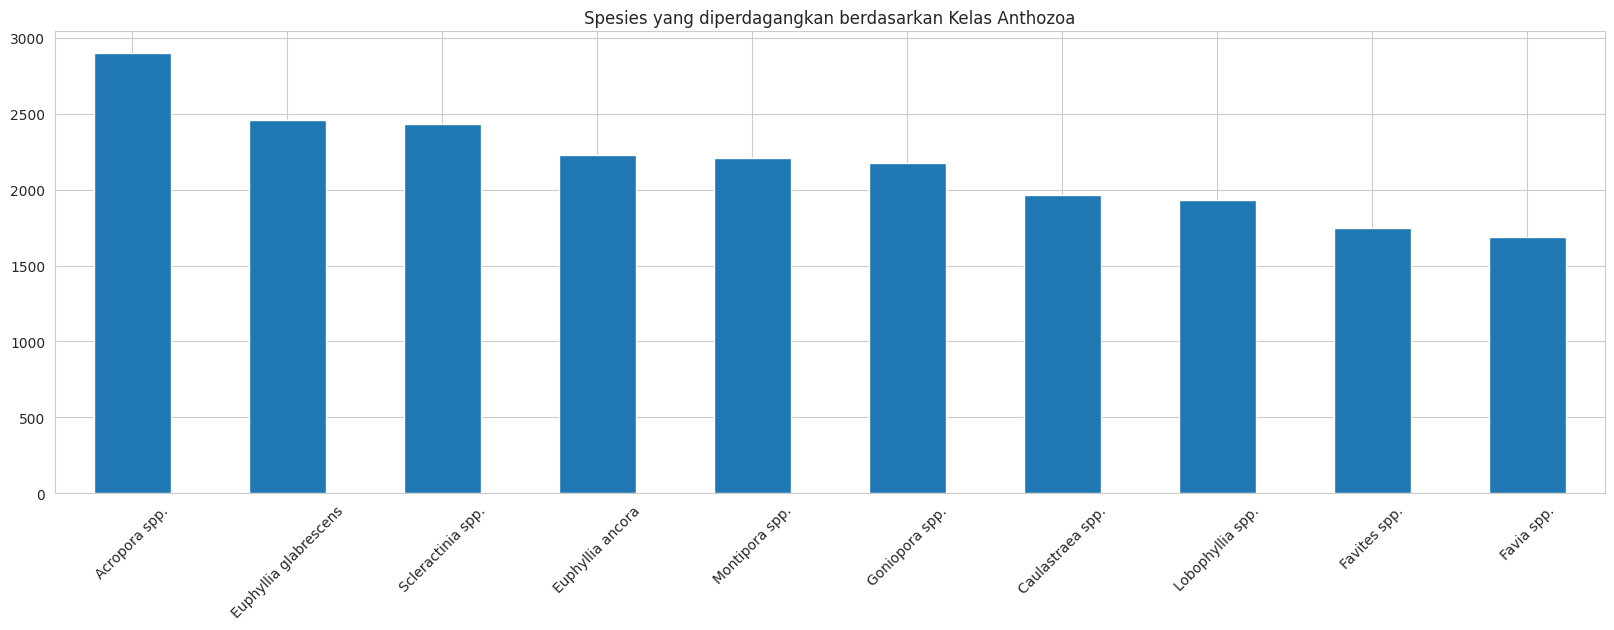

In [184]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Class'] == 'Anthozoa']
spesies_counts = df_spesies['Taxon'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Spesies yang diperdagangkan berdasarkan Kelas Anthozoa')
plt.xticks(rotation=45)
plt.show()

#Spesies yang paling banyak diperdagangkan berdasarkan Ordo

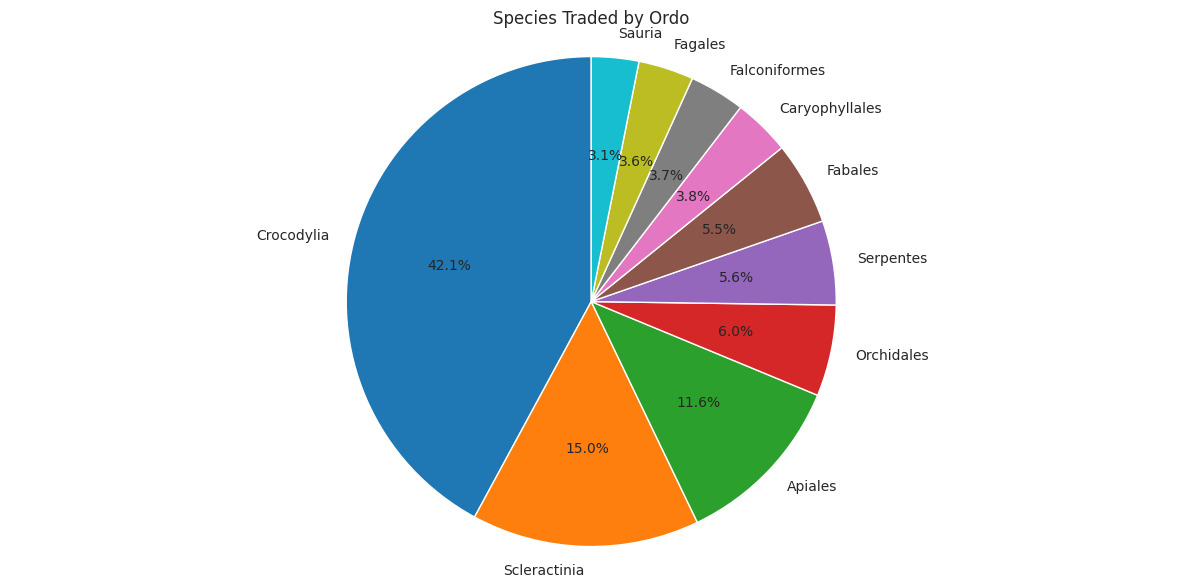

In [116]:
# Menghitung jumlah spesies yang diperdagangkan berdasarkan Ordo
species_counts = df2['Order'].value_counts()

# Mengambil 10 Ordo dengan jumlah spesies terbanyak
top_5_genus = species_counts.head(10)

# Membuat diagram lingkaran
plt.figure(figsize=(15, 7))
plt.pie(top_5_genus, labels=top_5_genus.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Traded by Ordo')
plt.axis('equal')

# Menampilkan diagram lingkaran
plt.show()


#Spesies yang paling banyak diperdagangkan berdasarkan Family

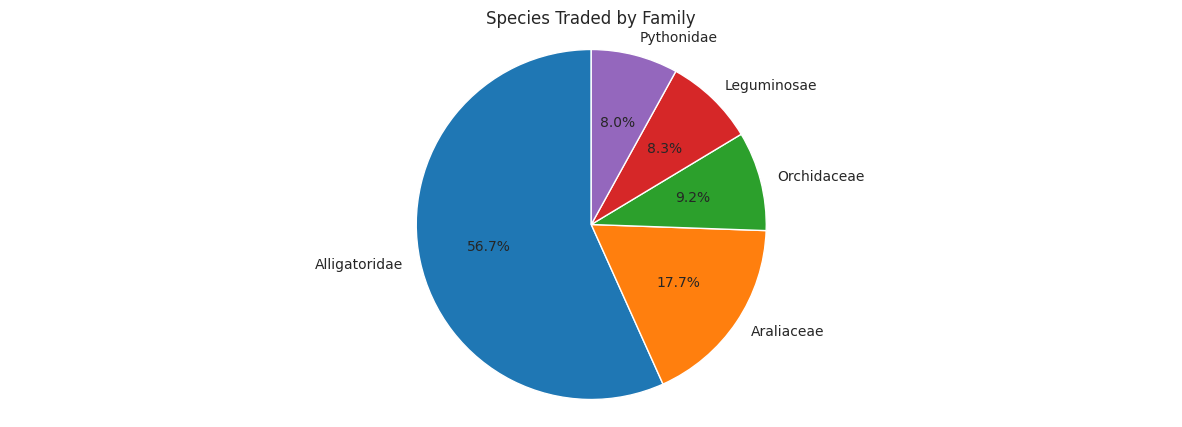

In [118]:
# Menghitung jumlah spesies yang diperdagangkan berdasarkan Family
species_counts = df2['Family'].value_counts()

# Mengambil 10 Family dengan jumlah spesies terbanyak
top_5_genus = species_counts.head(5)

# Membuat diagram lingkaran
plt.figure(figsize=(15, 5))
plt.pie(top_5_genus, labels=top_5_genus.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Traded by Family')
plt.axis('equal')

# Menampilkan diagram lingkaran
plt.show()


#Spesies yang paling banyak diperdagangkan berdasarkan Genus

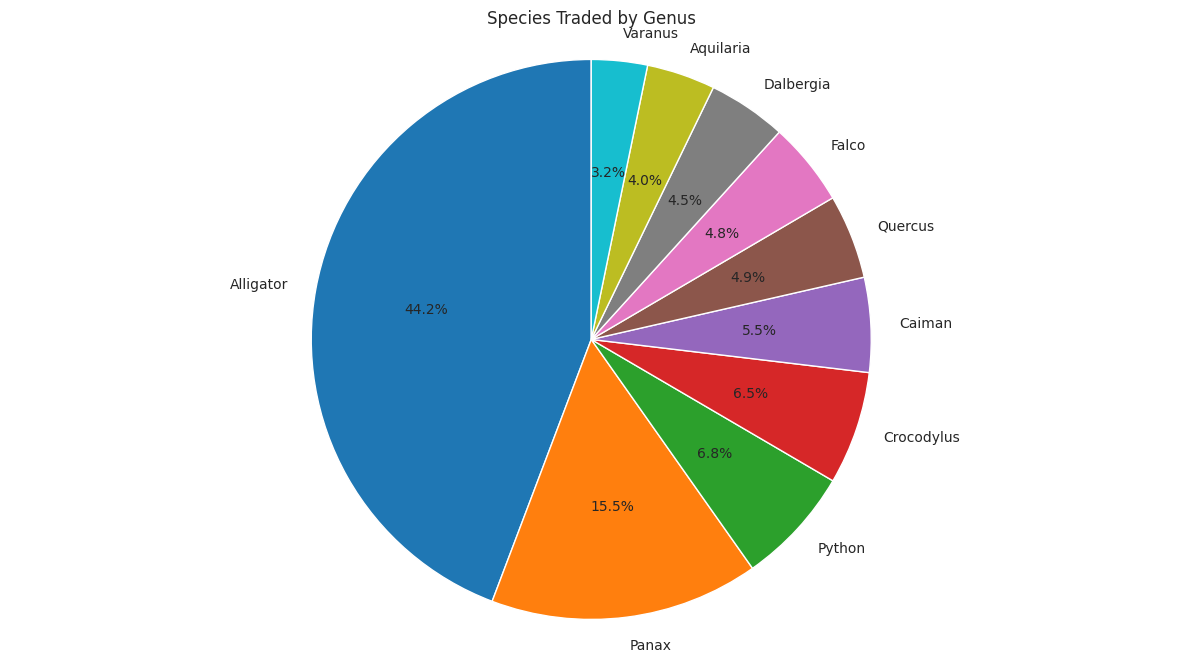

In [115]:
# Menghitung jumlah spesies yang diperdagangkan berdasarkan genus
species_counts = df2['Genus'].value_counts()

# Mengambil 10 genus dengan jumlah spesies terbanyak
top_5_genus = species_counts.head(10)

# Membuat diagram lingkaran
plt.figure(figsize=(15, 8))
plt.pie(top_5_genus, labels=top_5_genus.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Traded by Genus')
plt.axis('equal')

# Menampilkan diagram lingkaran
plt.show()


# Tujuan perdagangan flora dan fauna



<Figure size 1000x500 with 0 Axes>

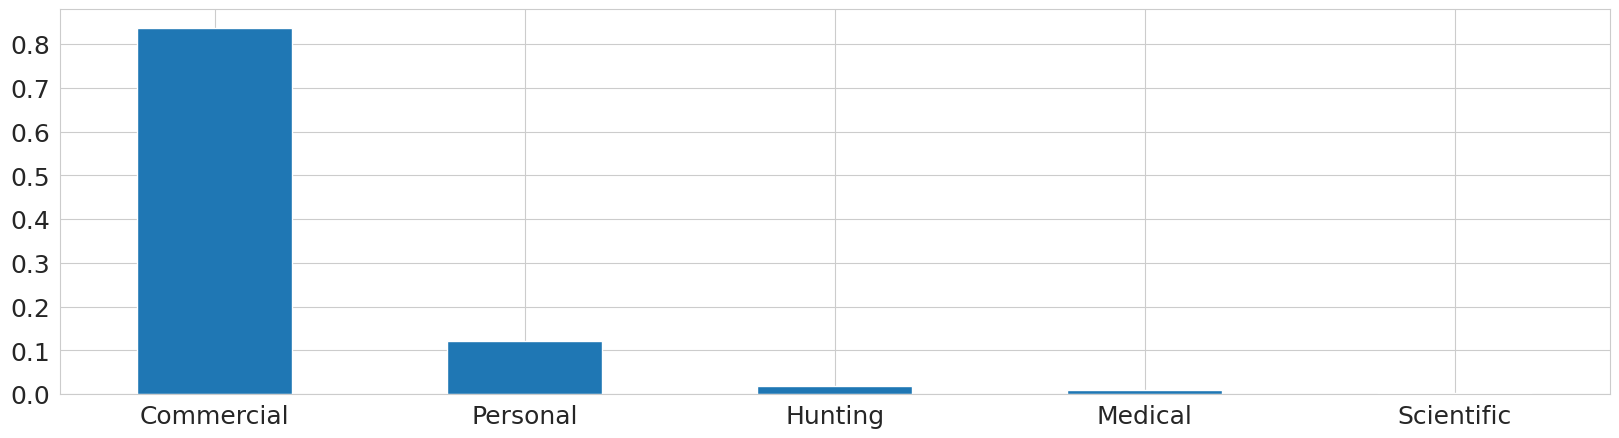

<Figure size 1000x500 with 0 Axes>

In [105]:
class_distribution = df2['Purpose'].value_counts(normalize=True)
plt.figure(figsize=(20,5))
class_distribution.head(5).plot(kind='bar', fontsize=18)
plt.xticks(rotation=0)
plt.figure(figsize=(10,5))

Perdagangan hewan yang terjadi banyak bertujuan untuk commercial.

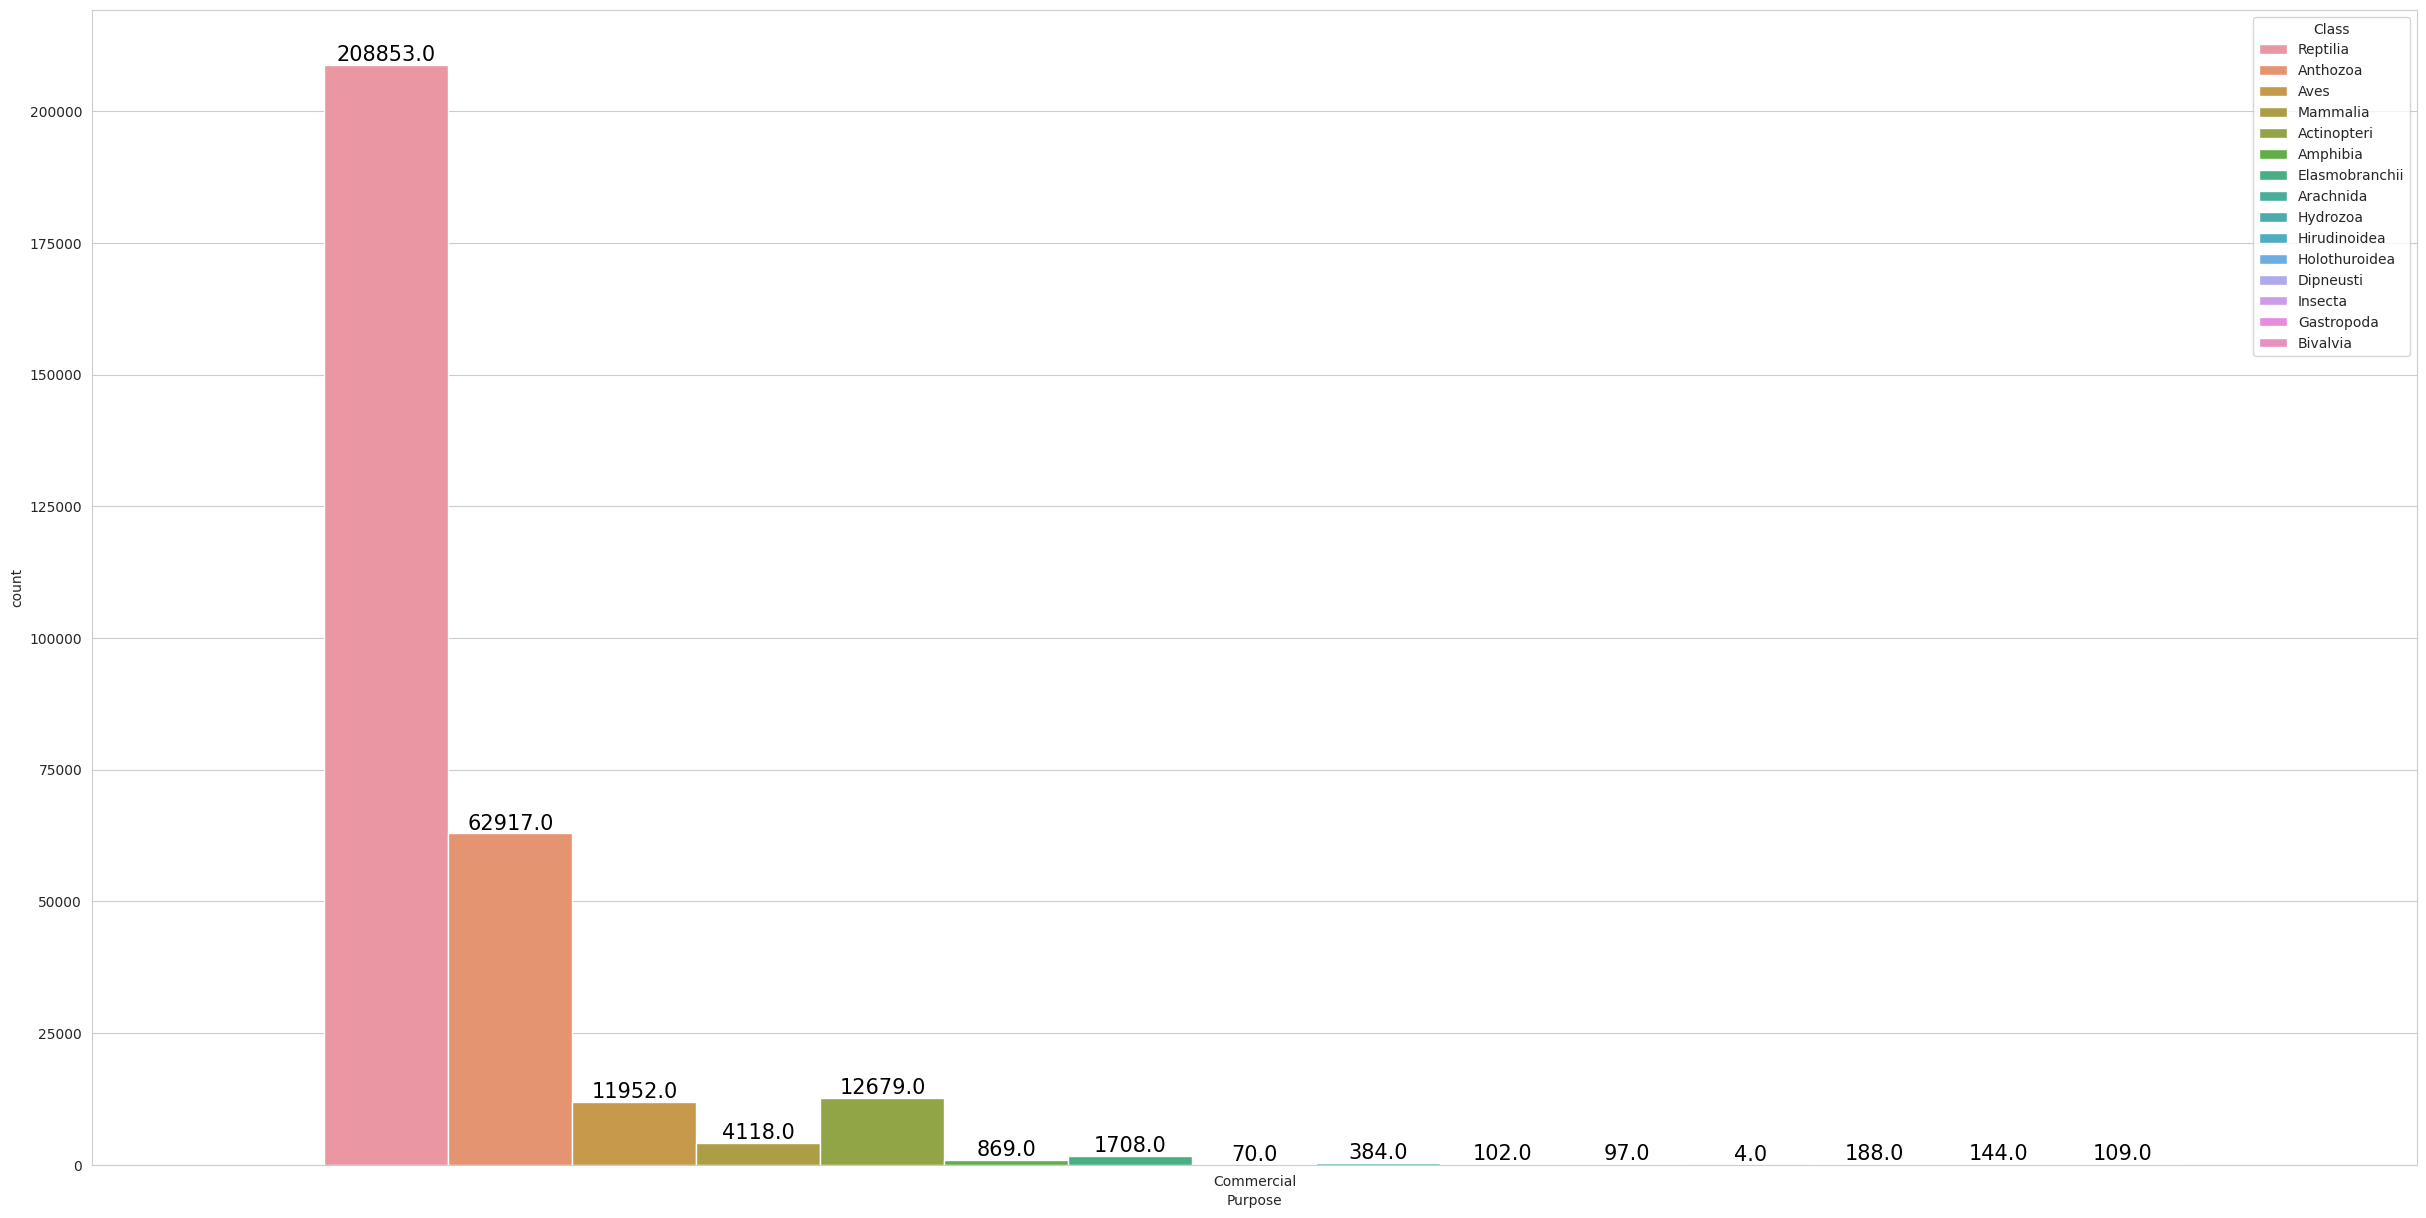

In [96]:
# Filter data hanya untuk kategori 'Commercial'
df_commercial = df2[df2['Purpose'] == 'Commercial']

# Mengambil data unik dari kolom "Commercial"
commercial_values = df_commercial['Class'].unique()


selected_data = df2[df2['Purpose'].isin(['Commercial']) & df2['Class'].isin(commercial_values)]

# Membuat visualisasi bar chart
plt.figure(figsize=(30, 15))
ax = sns.countplot(x='Purpose', hue='Class', data=selected_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')
plt.show()


Dengan Reptil dan Anthozoa menjadi kelas spesies yang paling banyak diperdagangkan dengan tujuan komersil.

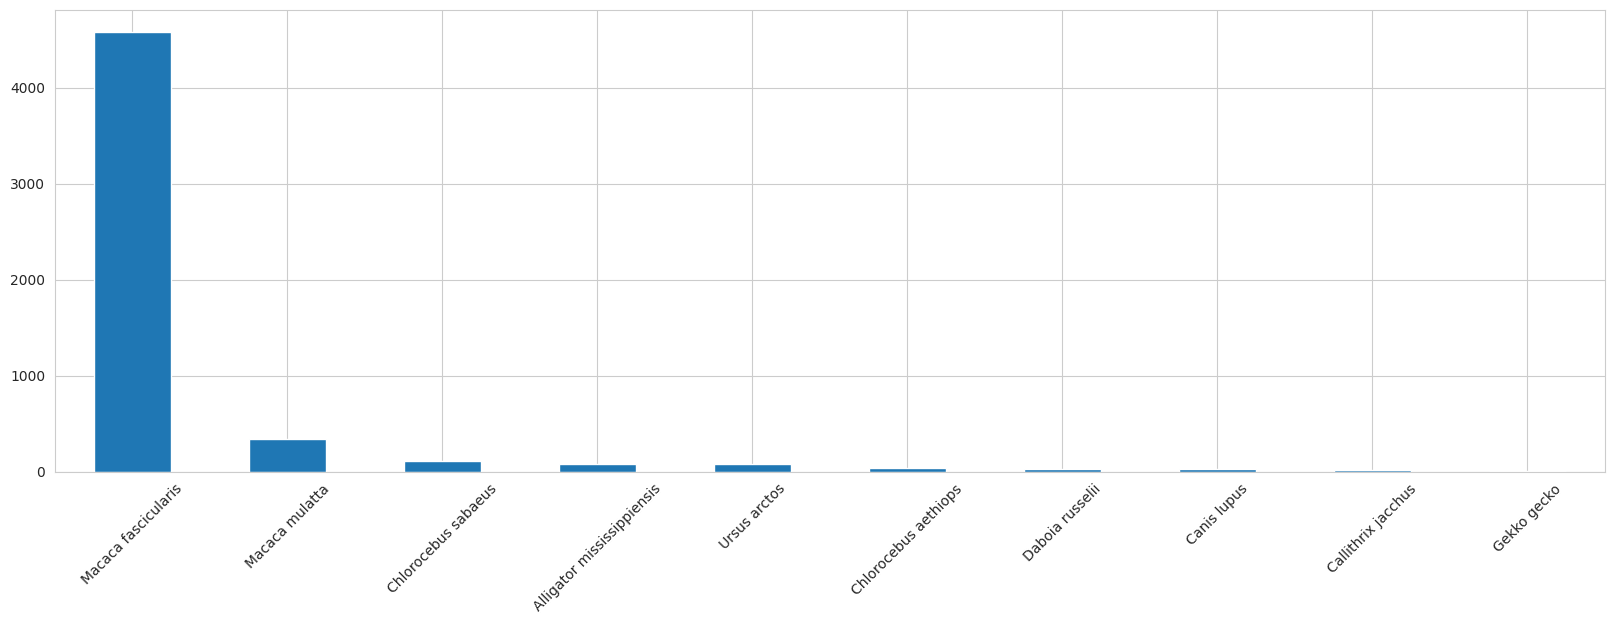

In [180]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Purpose'] == 'Medical']
spesies_counts = df_spesies['Taxon'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

Untuk tujuan Medical, Macaca fascicularis menjadi spesimens spesies yang banyak menjadi korban perdagangan hewan.

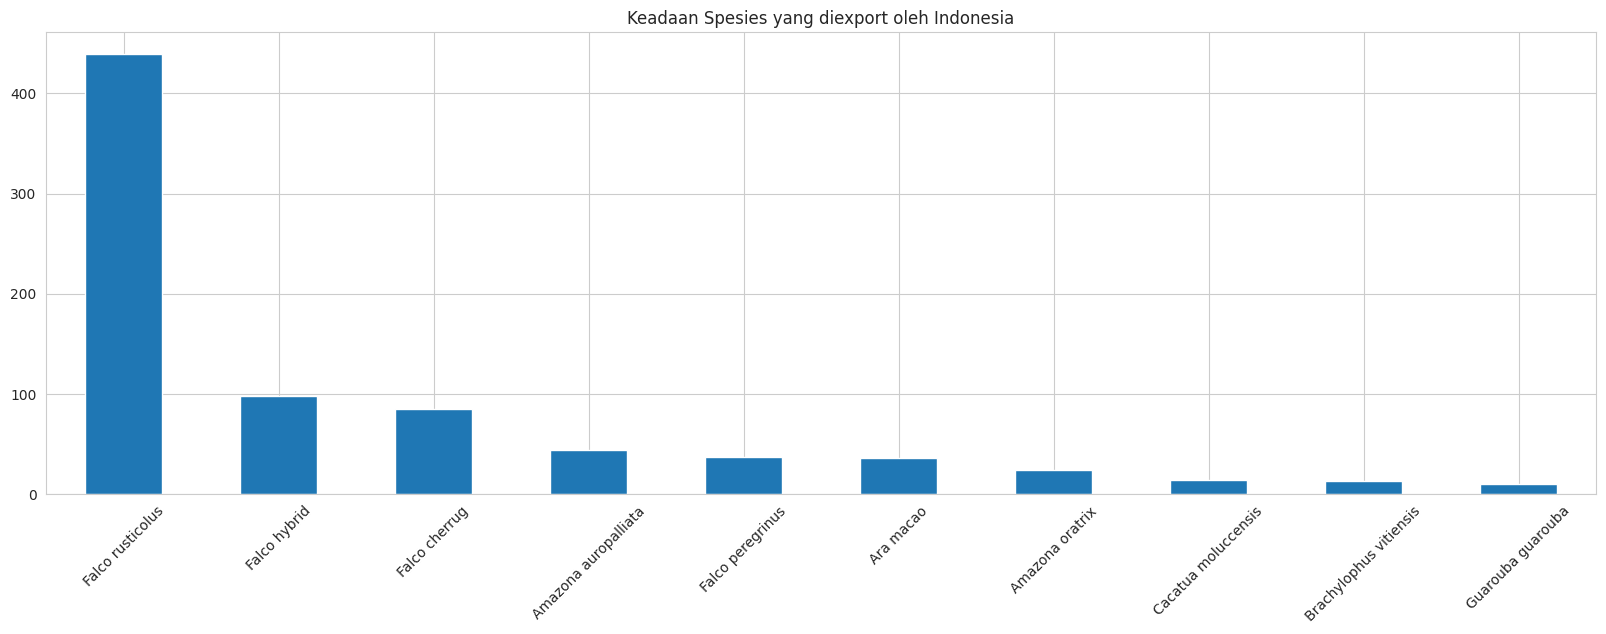

In [179]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Purpose'] == 'Breeding']
spesies_counts = df_spesies['Taxon'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Keadaan Spesies yang diexport oleh Indonesia')
plt.xticks(rotation=45)
plt.show()

Untuk tujuan Breeding, Falco rusticolus dan kelas Alves (hewan dari subfilum Vertebrata yang bagian tubuhnya tertutup bulu, tetapi bagian bawah kakinya tertutup sisik/burung) menjadi spesimens spesies yang banyak menjadi korban perdagangan hewan untuk ditelurkan.

# Distribusi perdagangan flora dan fauna berdasarkan tahun

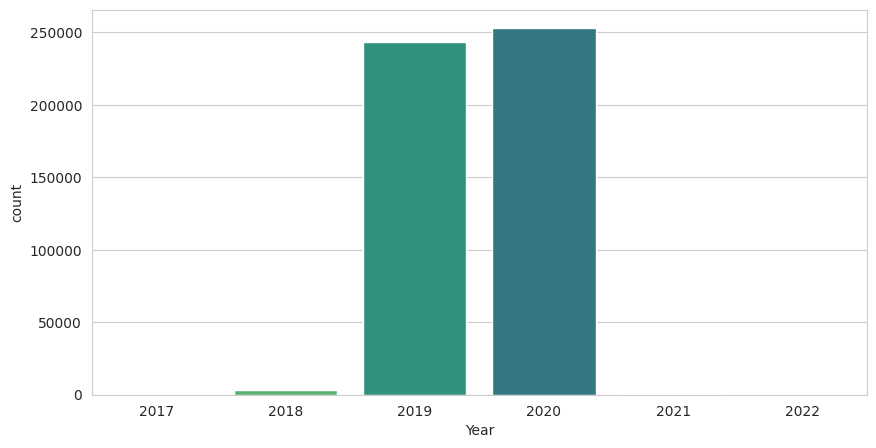

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(x=df2['Year'],palette='viridis_r')
plt.show()

Dari data, dapat dilihat bahwa tahun 2019 dan 2020 merupakan tahun dengan perdagangan hewan paling banyak.

# Negara Eksport

<Axes: title={'center': 'Top 10 countries as the Exporter'}, xlabel='count', ylabel='Excountry'>

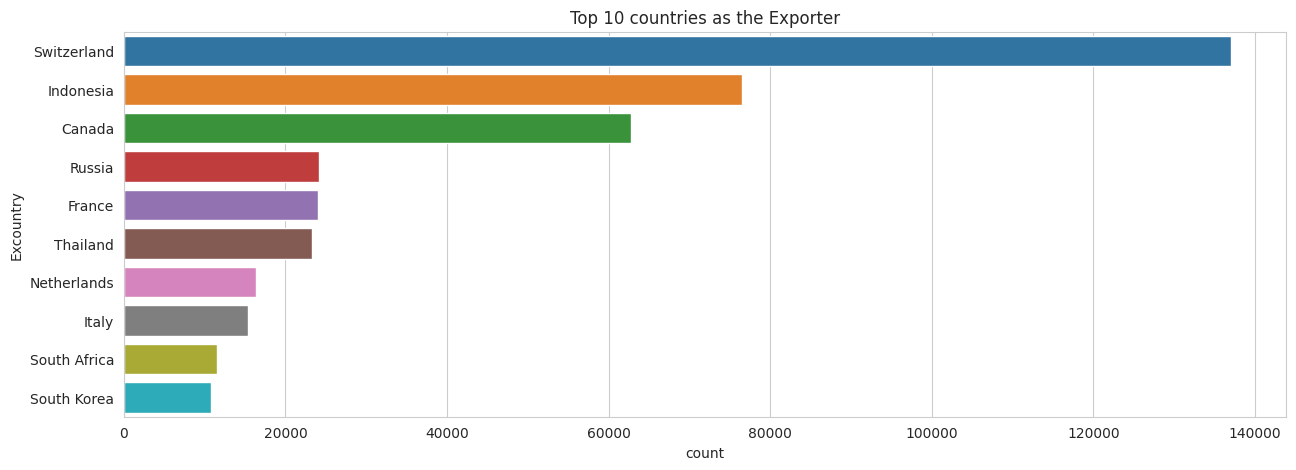

In [167]:
#Top Five Importer Countries
plt.subplots(figsize=(15,5))
plt.title('Top 10 countries as the Exporter')
sns.countplot(y = 'Excountry', order = df2['Excountry'].value_counts().index[0:10], data = df2)

Switzerland, Indonesia, dan Canada menjadi negara sebagai exporter perdagangan flora dan fauna terbanyak di dunia.

# Negara Import

<Axes: title={'center': 'Top 10 countries as the importer'}, xlabel='count', ylabel='Imcountry'>

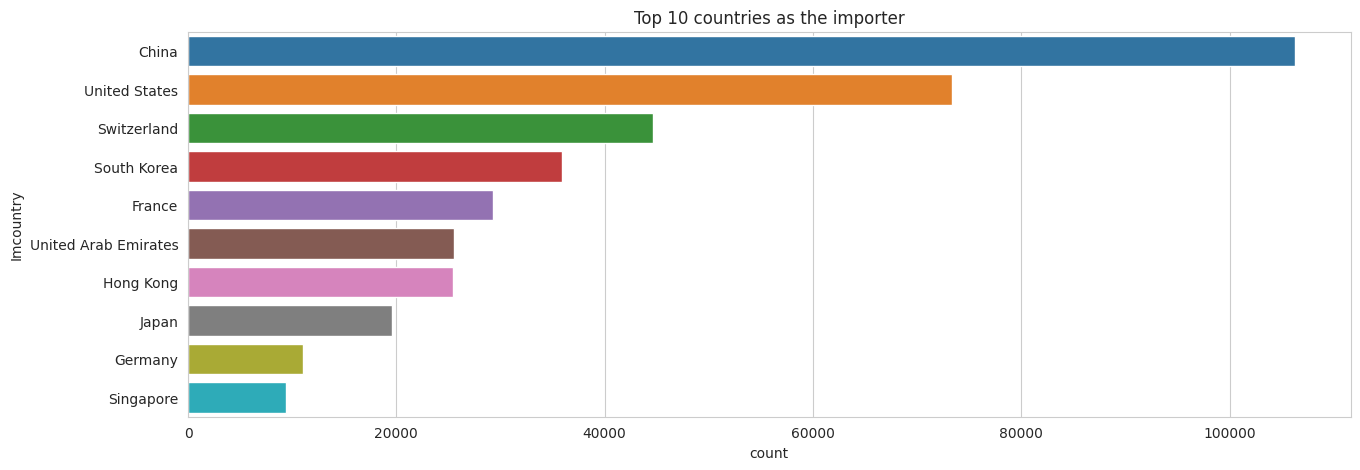

In [123]:
#Top Five Importer Countries
plt.subplots(figsize=(15,5))
plt.title('Top 10 countries as the importer')
sns.countplot(y = 'Imcountry', order = df2['Imcountry'].value_counts().index[0:10], data = df2)

China dan Amerika menjadi negara sebagai Importir perdagangan flora dan fauna terbanyak di dunia.

# Kondisi Hewan saat diperdagangkan

In [87]:
unique_categories = df['Term'].unique()
print(unique_categories)

['live' 'raw corals' 'unspecified' 'skulls' 'feathers' 'derivatives'
 'trophies' 'bodies' 'leather products (small)' 'specimens' 'caviar'
 'cosmetics' 'extract' 'meat' 'eggs' 'swim bladders' 'powder' 'skins'
 'skin pieces' 'horns' 'roots' 'bones' 'jewellery'
 'leather products (large)' 'garments' 'medicine' 'plates' 'sides'
 'leaves' 'stems' 'dried plants' 'cultures' 'baleen' 'fins' 'oil'
 'carvings' 'chips' 'logs' 'wood product' 'bark' 'timber' 'sawn wood'
 'seeds' 'fur product (small)' 'genitalia' 'bone carvings' 'skeletons'
 'bone pieces' 'horn carvings' 'tails' 'teeth' 'rug' 'claws' 'feet'
 'shells' 'carapaces' 'plywood' 'gall bladders' 'fibres' 'musk' 'veneer'
 'transformed wood' 'flowers' 'ivory carvings' 'piano keys' 'ivory pieces'
 'tusks' 'wax' 'hair' 'eggs (live)' 'timber pieces' 'cloth' 'kernel'
 'ears' 'trunk' 'jewellery - ivory ' 'hair products'
 'fur products (large)' 'gill plates' 'scales' 'pearl' 'pupae' 'gall']


<Axes: xlabel='count', ylabel='Term'>

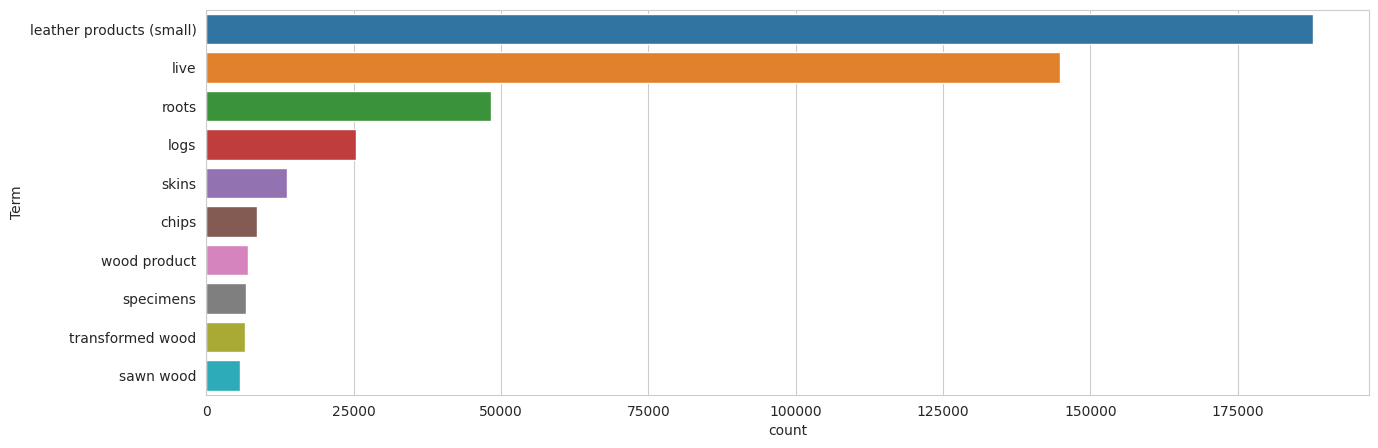

In [101]:
plt.subplots(figsize=(15,5))
sns.countplot(y = 'Term', order = df2['Term'].value_counts().index[0:10], data = df2)

Text(0.5, 1.0, 'Amount of 15 most traded animal goods')

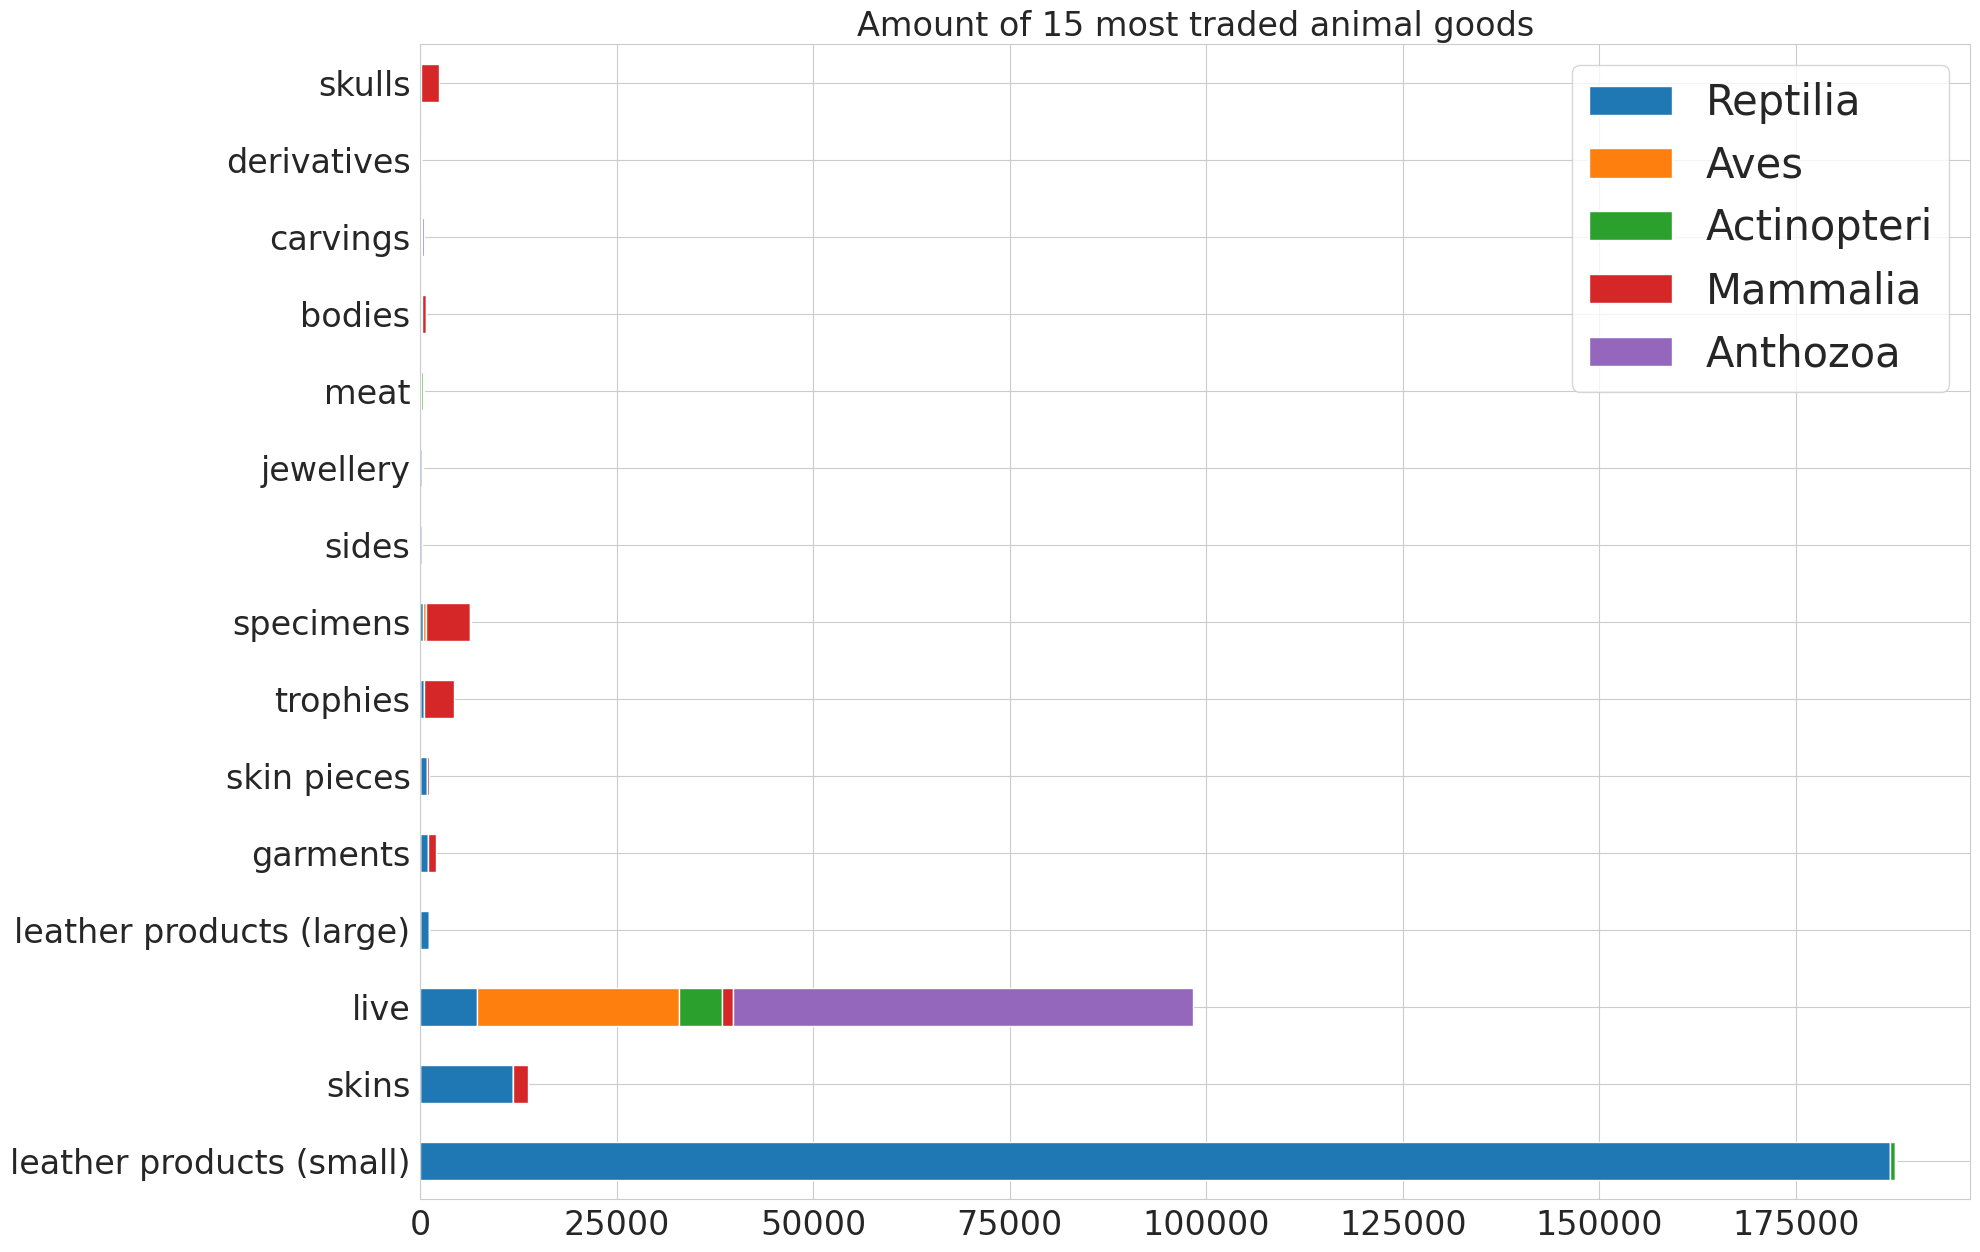

In [104]:
animal_classes = ['Reptilia', 'Aves', 'Actinopteri', 'Mammalia', 'Anthozoa']
stacked_data = pd.DataFrame()
for i in animal_classes:
  stacked_data[i] = df2['Term'].loc[df2['Class']==i].value_counts()
stacked_data.head(15).plot.barh(figsize=(20,15), fontsize=24, stacked=True)
#plt.xscale('log') #  applying logscale removes Reptilia bar color?!
plt.legend(fontsize=30)
plt.title('Amount of 15 most traded animal goods', fontsize=24)

Kondisi spesies yang diperdagangan paling banyak adalah kulit dengan spesies Reptilia dan keadaan hidup yakni spesies Anthozoa.

# Perdagangan Hewan di Indonesia

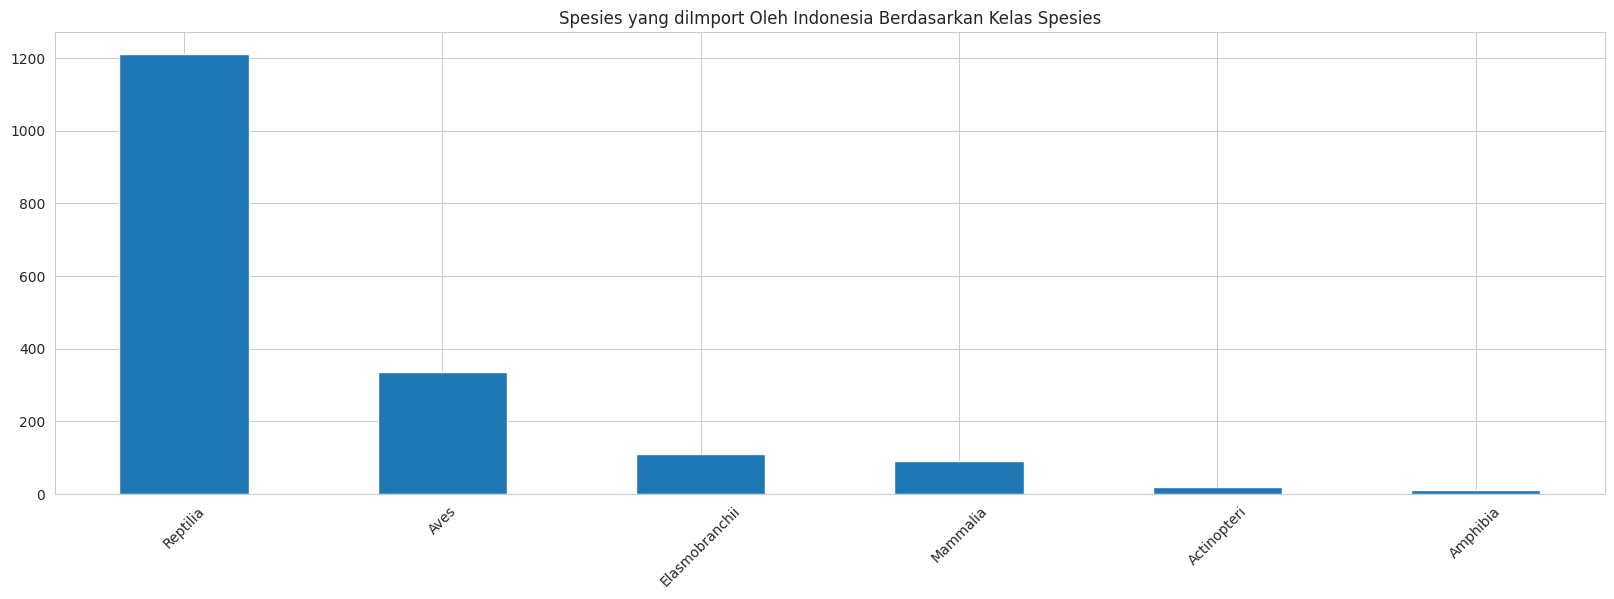

In [157]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Imcountry'] == 'Indonesia']
spesies_counts = df_spesies ['Class'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Spesies yang diImport Oleh Indonesia Berdasarkan Kelas Spesies')
plt.xticks(rotation=45)
plt.show()


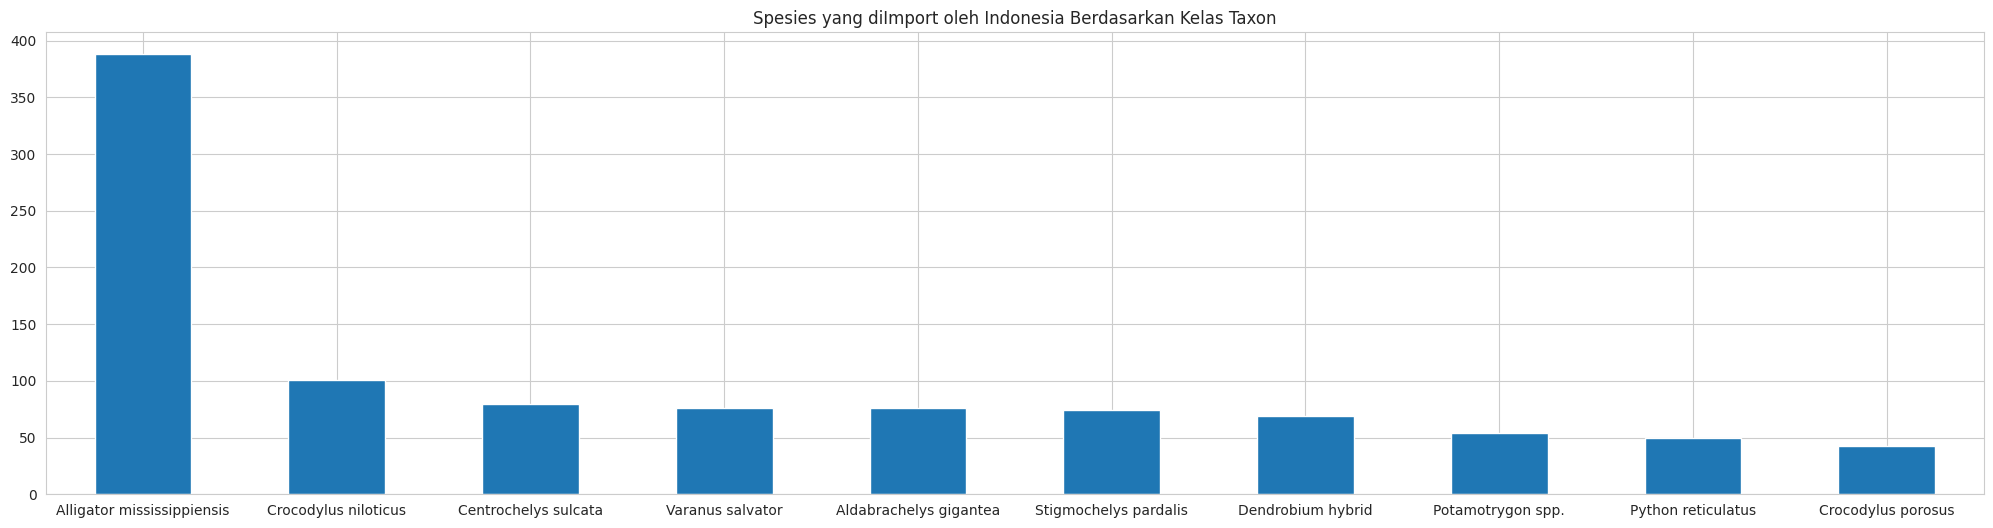

In [156]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Imcountry'] == 'Indonesia']
spesies_counts = df_spesies ['Taxon'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(25, 6))
spesies_counts.plot(kind='bar')
plt.title('Spesies yang diImport oleh Indonesia Berdasarkan Kelas Taxon')
plt.xticks(rotation=0)
plt.show()


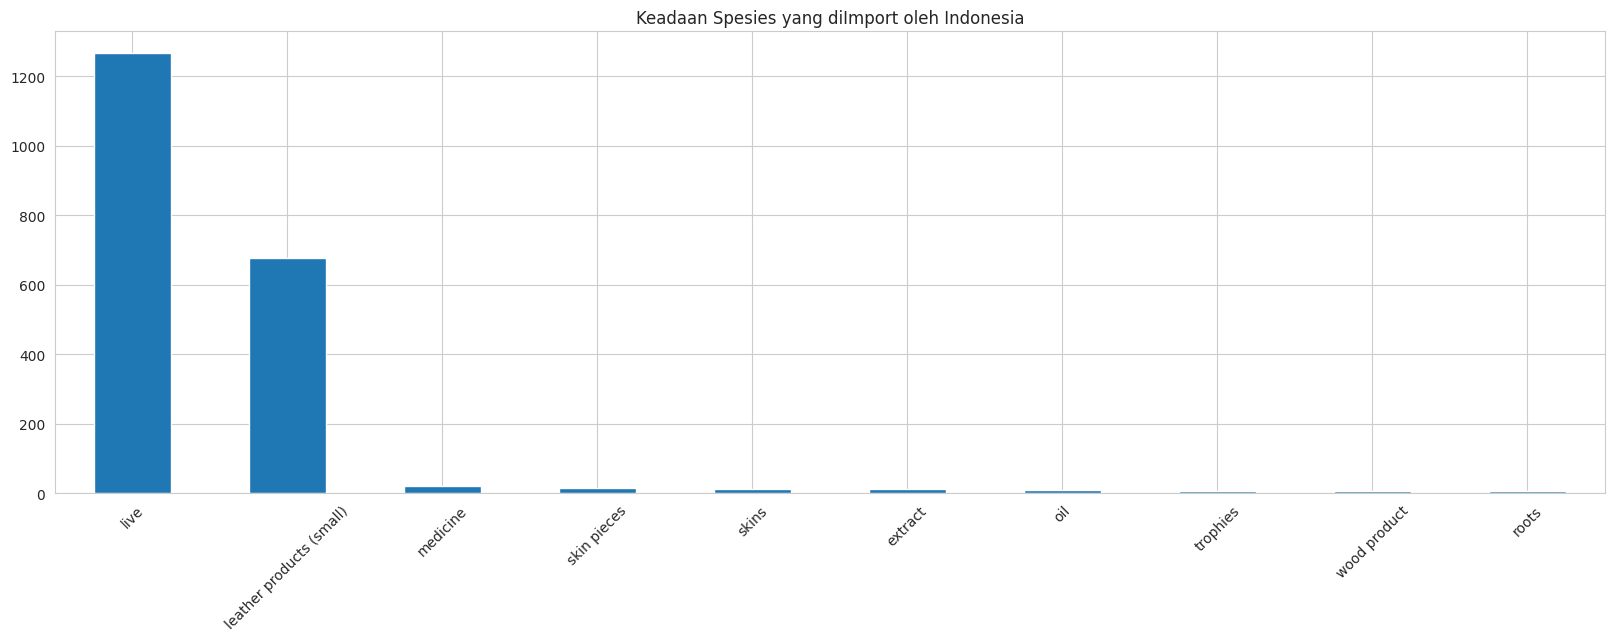

In [158]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Imcountry'] == 'Indonesia']
spesies_counts = df_spesies['Term'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Keadaan Spesies yang diImport oleh Indonesia')
plt.xticks(rotation=45)
plt.show()


Indonesia juga termasuk kedalam negara yang menjadi negara dengan adanya perdagangan flora dan fauna. Sebagai negara Importir flora dan fauna, Indonesia mengimport spesies "Alligator mississippiensis" sebagai spesies yang banyak dimport dengan keadaan hidup maupun kulit.

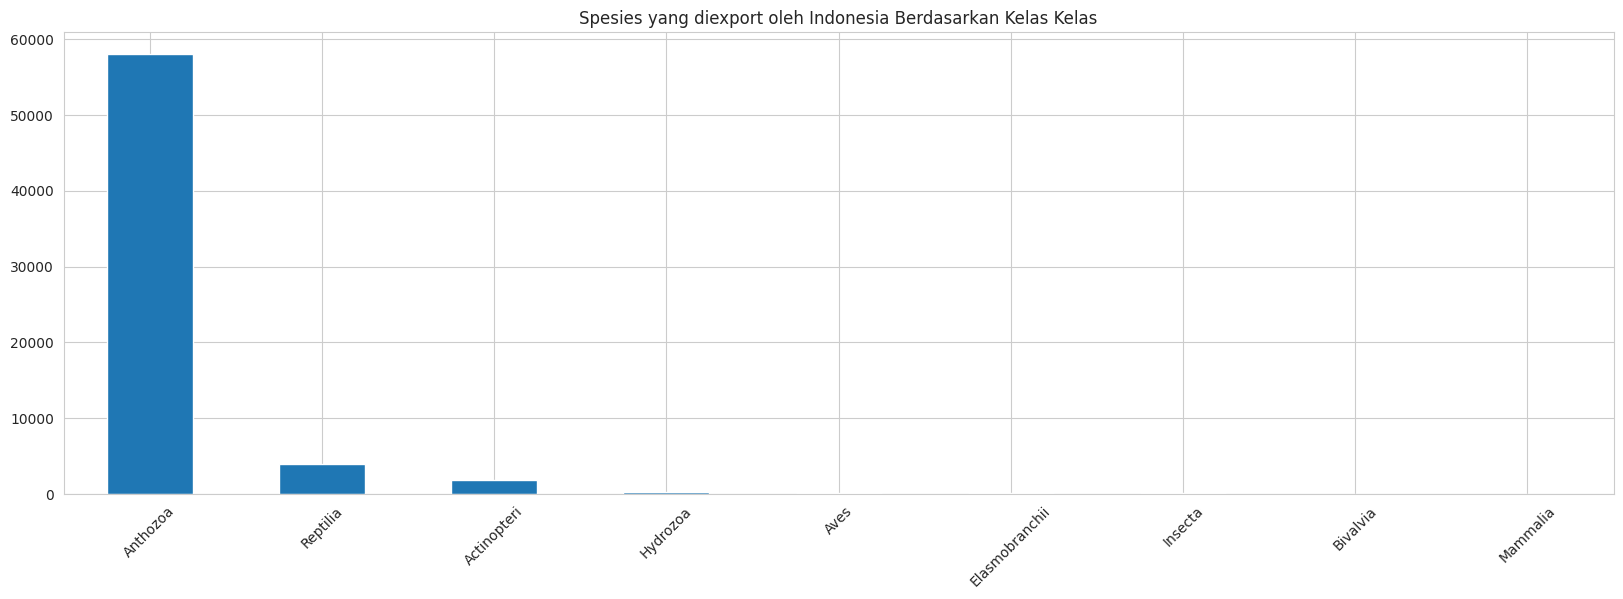

In [159]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Excountry'] == 'Indonesia']
spesies_counts = df_spesies ['Class'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Spesies yang diexport oleh Indonesia Berdasarkan Kelas Kelas')
plt.xticks(rotation=45)
plt.show()


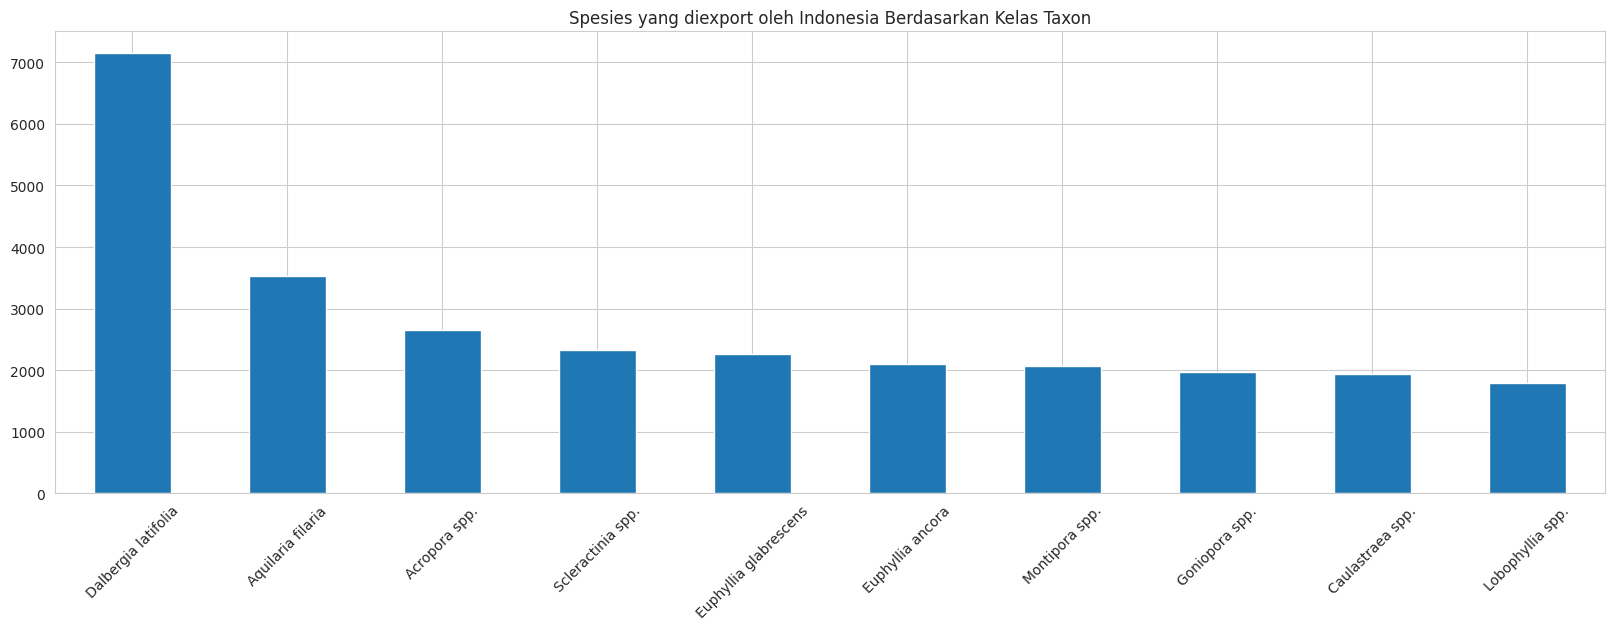

In [162]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Excountry'] == 'Indonesia']
spesies_counts = df_spesies ['Taxon'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Spesies yang diexport oleh Indonesia Berdasarkan Kelas Taxon')
plt.xticks(rotation=45)
plt.show()


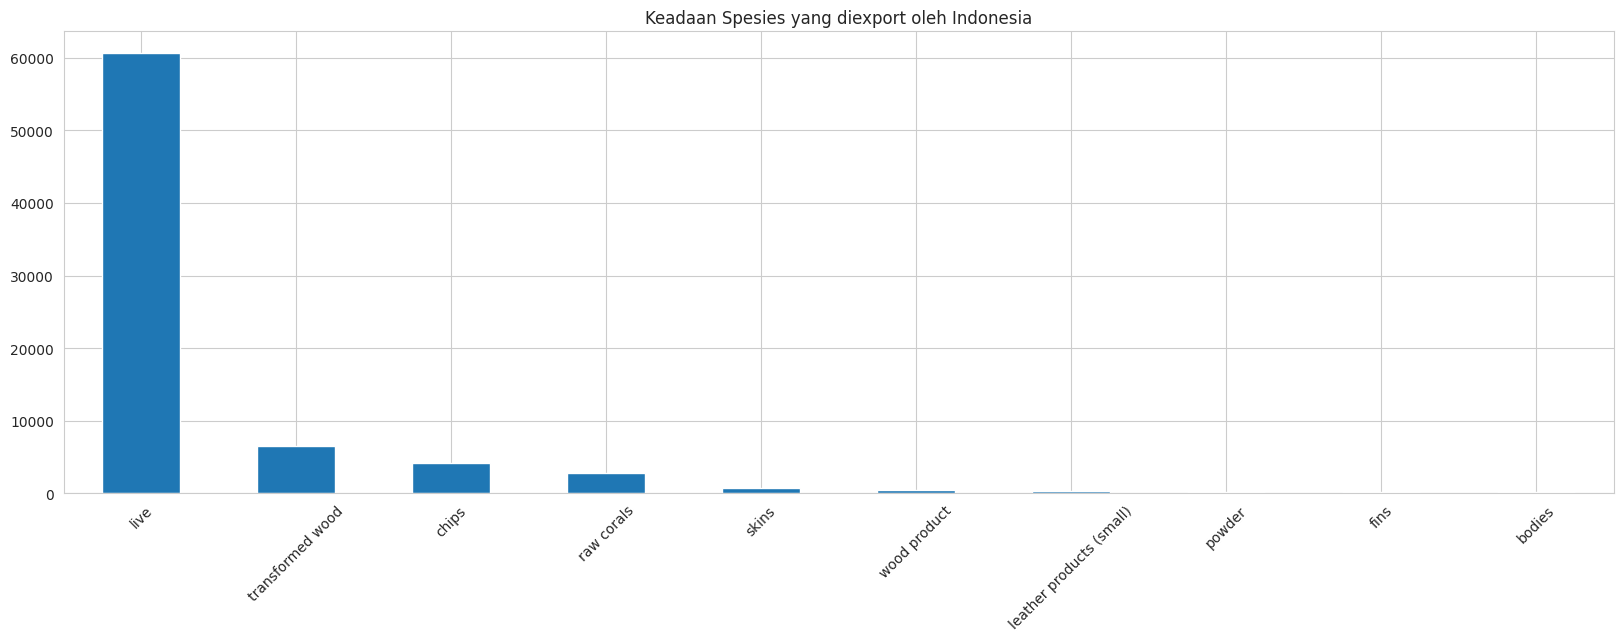

In [161]:
# Filter data hanya untuk kategori
df_spesies = df2[df2['Excountry'] == 'Indonesia']
spesies_counts = df_spesies['Term'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(20, 6))
spesies_counts.plot(kind='bar')
plt.title('Keadaan Spesies yang diexport oleh Indonesia')
plt.xticks(rotation=45)
plt.show()


Sebagai negara yang melakukan perdagangan flora dan fauna sebagai eksportir, Indonesia mengeksport spesies dengan kelas Anthozoa dengan taxon Dalbergia latifolia dan Aquilaria filaria sebagai spesies yang banyak dimport dengan keadaan hidup.

Untuk diketahui bahwa Anthozoa adalah kelas dari anggota hewan tak bertulang belakang yang termasuk dalam filum Cnidaria. Anthozoa berasal dari bahasa Yunani, anthos berarti bunga, dan zoon berarti hewan. Anthozoa berarti hewan yang bentuknya seperti bunga atau hewan bunga, yang meliputi anemon laut serta hewan-hewan karang.

# PETA (Map Visualization)

## Peta Persebaran Negara Importir

<ipython-input-187-33a3b7cb0a0c>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

<ipython-input-187-33a3b7cb0a0c>:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



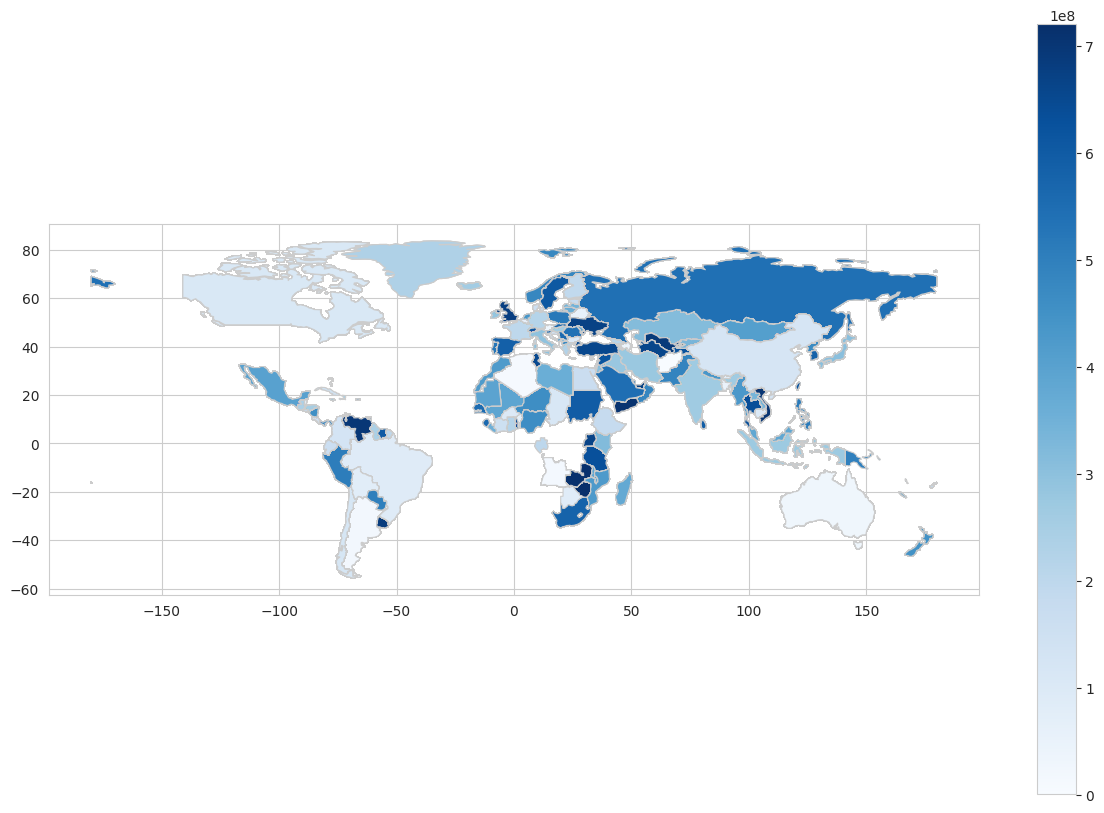

In [187]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Membaca shapefile negara
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Menggabungkan data csv dengan shapefile berdasarkan kolom 'Imcountry'
merged_data = world.merge(df2, left_on='name', right_on='Imcountry')

# Membuat plot pemetaan
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='Imcountry', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Menampilkan legenda
vmin = merged_data['Quantity'].min()
vmax = merged_data['Quantity'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

# Menampilkan plot
plt.show()
